## Import PyTorch

In [1]:
import torch

## Creating a dummy dataset

In [2]:
import numpy as np
x_train = np.concatenate([np.random.rand(50, 64), np.random.rand(50, 64)+0.0001], dtype=np.float32)
y_train = np.concatenate([np.zeros([50, 1]), np.ones([50, 1])], dtype=np.float32)

## Defining a Neural Network model using PyTorch

In [3]:
class TorchNN(torch.nn.Module):
    def __init__(self, layers=[64, 16, 1]):
        super(TorchNN, self).__init__()
        self.layer_1 = torch.nn.Linear(layers[0], layers[1])
        self.layer_2 = torch.nn.Linear(layers[1], layers[2])
    def forward(self, x):
        hidden_1 = torch.relu(self.layer_1(x))
        output = torch.sigmoid(self.layer_2(hidden_1))
        return output

## Defining model hyperparameters

In [9]:
layers = [64, 16, 1] 
learningRate = 0.1
num_iters = 1000
losses = []

## Instantiating the model, optimiser, and loss function

In [10]:
nn = TorchNN(layers)
criterion = torch.nn.BCELoss() 
optimizer = torch.optim.SGD(nn.parameters(), lr=learningRate)

## Train the model

In [11]:
inputs = torch.from_numpy(x_train)
labels = torch.from_numpy(y_train)
for i in range(num_iters):
    optimizer.zero_grad()

    # forward pass
    outputs = nn(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    losses.append(float(loss))

    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()
    
    if i%(num_iters/10)==0:
        print(f"Loss at epoch {i} is : {loss}")

Loss at epoch 0 is : 0.7084357738494873
Loss at epoch 100 is : 0.6534767746925354
Loss at epoch 200 is : 0.5394963622093201
Loss at epoch 300 is : 0.37875306606292725
Loss at epoch 400 is : 0.26459288597106934
Loss at epoch 500 is : 0.18939071893692017
Loss at epoch 600 is : 0.13284626603126526
Loss at epoch 700 is : 0.09321299195289612
Loss at epoch 800 is : 0.06949136406183243
Loss at epoch 900 is : 0.05385497584939003


## Examine the training curve

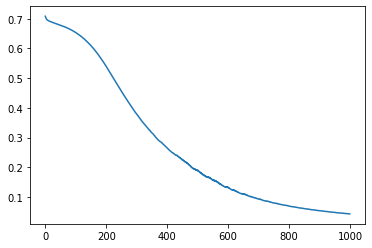

In [12]:
import matplotlib.pyplot as plt
plt.plot(losses);

## Evaluate model performance

In [13]:
with torch.no_grad(): 
    train_pred = torch.round(nn(torch.from_numpy(x_train)))
print("Accuracy on train set is {}%".format(100*sum(train_pred==labels)[0]/len(labels)))

Accuracy on train set is 100.0%
